In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
import keras
keras.__version__

'2.4.3'

# Pesos de la red entrenada:
Hacer click y agregar al drive personal:
 
https://drive.google.com/open?id=1Nzz6UnVx1qCRQ8I6NhL1L8O0gtlvFxwp

In [2]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image
from yolo_helper import plot_batch_with_predictions, get_YOLO_V2_NN, plot_bboxes, getIUO
from Object_Detection import ObjectDectection
import numpy as np

In [4]:
classes_names = {
    'n02165456': 'Vaquita de san antonio',
    'n02226429': 'grillo',
    'n01644373': 'sapo',
    'n02279972': 'mariposa',
    'n01632458': 'salamandra',
    'n02256656': 'chicharra',
    'n01774384': 'viuda negra',
    'n01770393': 'escorpion'
}
idx_2_class_id = {0: 'n02165456',
 1: 'n02226429',
 2: 'n01644373',
 3: 'n02279972',
 4: 'n01632458',
 5: 'n02256656',
 6: 'n01774384',
 7: 'n01770393'}

406 642


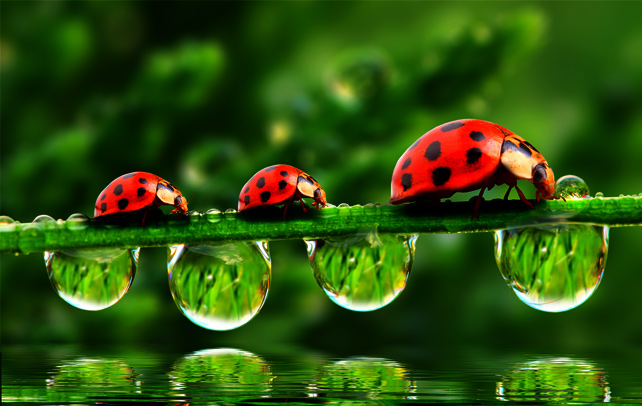

In [5]:
image = Image.open('ladybugs_3.jpg')
print(image.height, image.width)
image

In [6]:
from yolo_helper import get_YOLO_V2_NN
n_classes = len(classes_names)
GRID_H,  GRID_W  = int(np.round(image.height / 32)) , int(np.round(image.width / 32))
IMAGE_H, IMAGE_W = GRID_H*32, GRID_W*32
target_size = (IMAGE_H, IMAGE_W)

BOX = 1
CLASS = n_classes

object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='YOLO_V2')
model = object_detection.model

print(IMAGE_H, IMAGE_W)
print(GRID_H,  GRID_W)
model.layers[-1].output

416 640
13 20


<tf.Tensor 'reshape/Reshape:0' shape=(None, 13, 20, 1, 13) dtype=float32>

In [7]:
model.load_weights('./weights_yolo_loss_bigger_dataset.hdf5') 

In [8]:
image_array = np.array(image.resize([IMAGE_W,IMAGE_H])).reshape(1, IMAGE_H, IMAGE_W, 3)/255

In [44]:
predictions = model.predict(image_array)

In [45]:
predictions.shape

(1, 13, 20, 1, 13)

In [46]:
#Prediccion para el grid en x=3, y=6
x = 3
y = 6
predictions[0][y][x]

array([[ 0.0982649, 16.0746   , -2.4107375,  3.784494 , -0.9120623,
        -1.3392129, -3.7713635, -3.3427606, -2.983777 ,  1.0686736,
         0.4418409,  3.3858984,  2.1442652]], dtype=float32)

In [50]:
#Prediccion altura de bbox
predictions[0][y][x][0][12]*32 #32 altura de cada grid

68.61648559570312

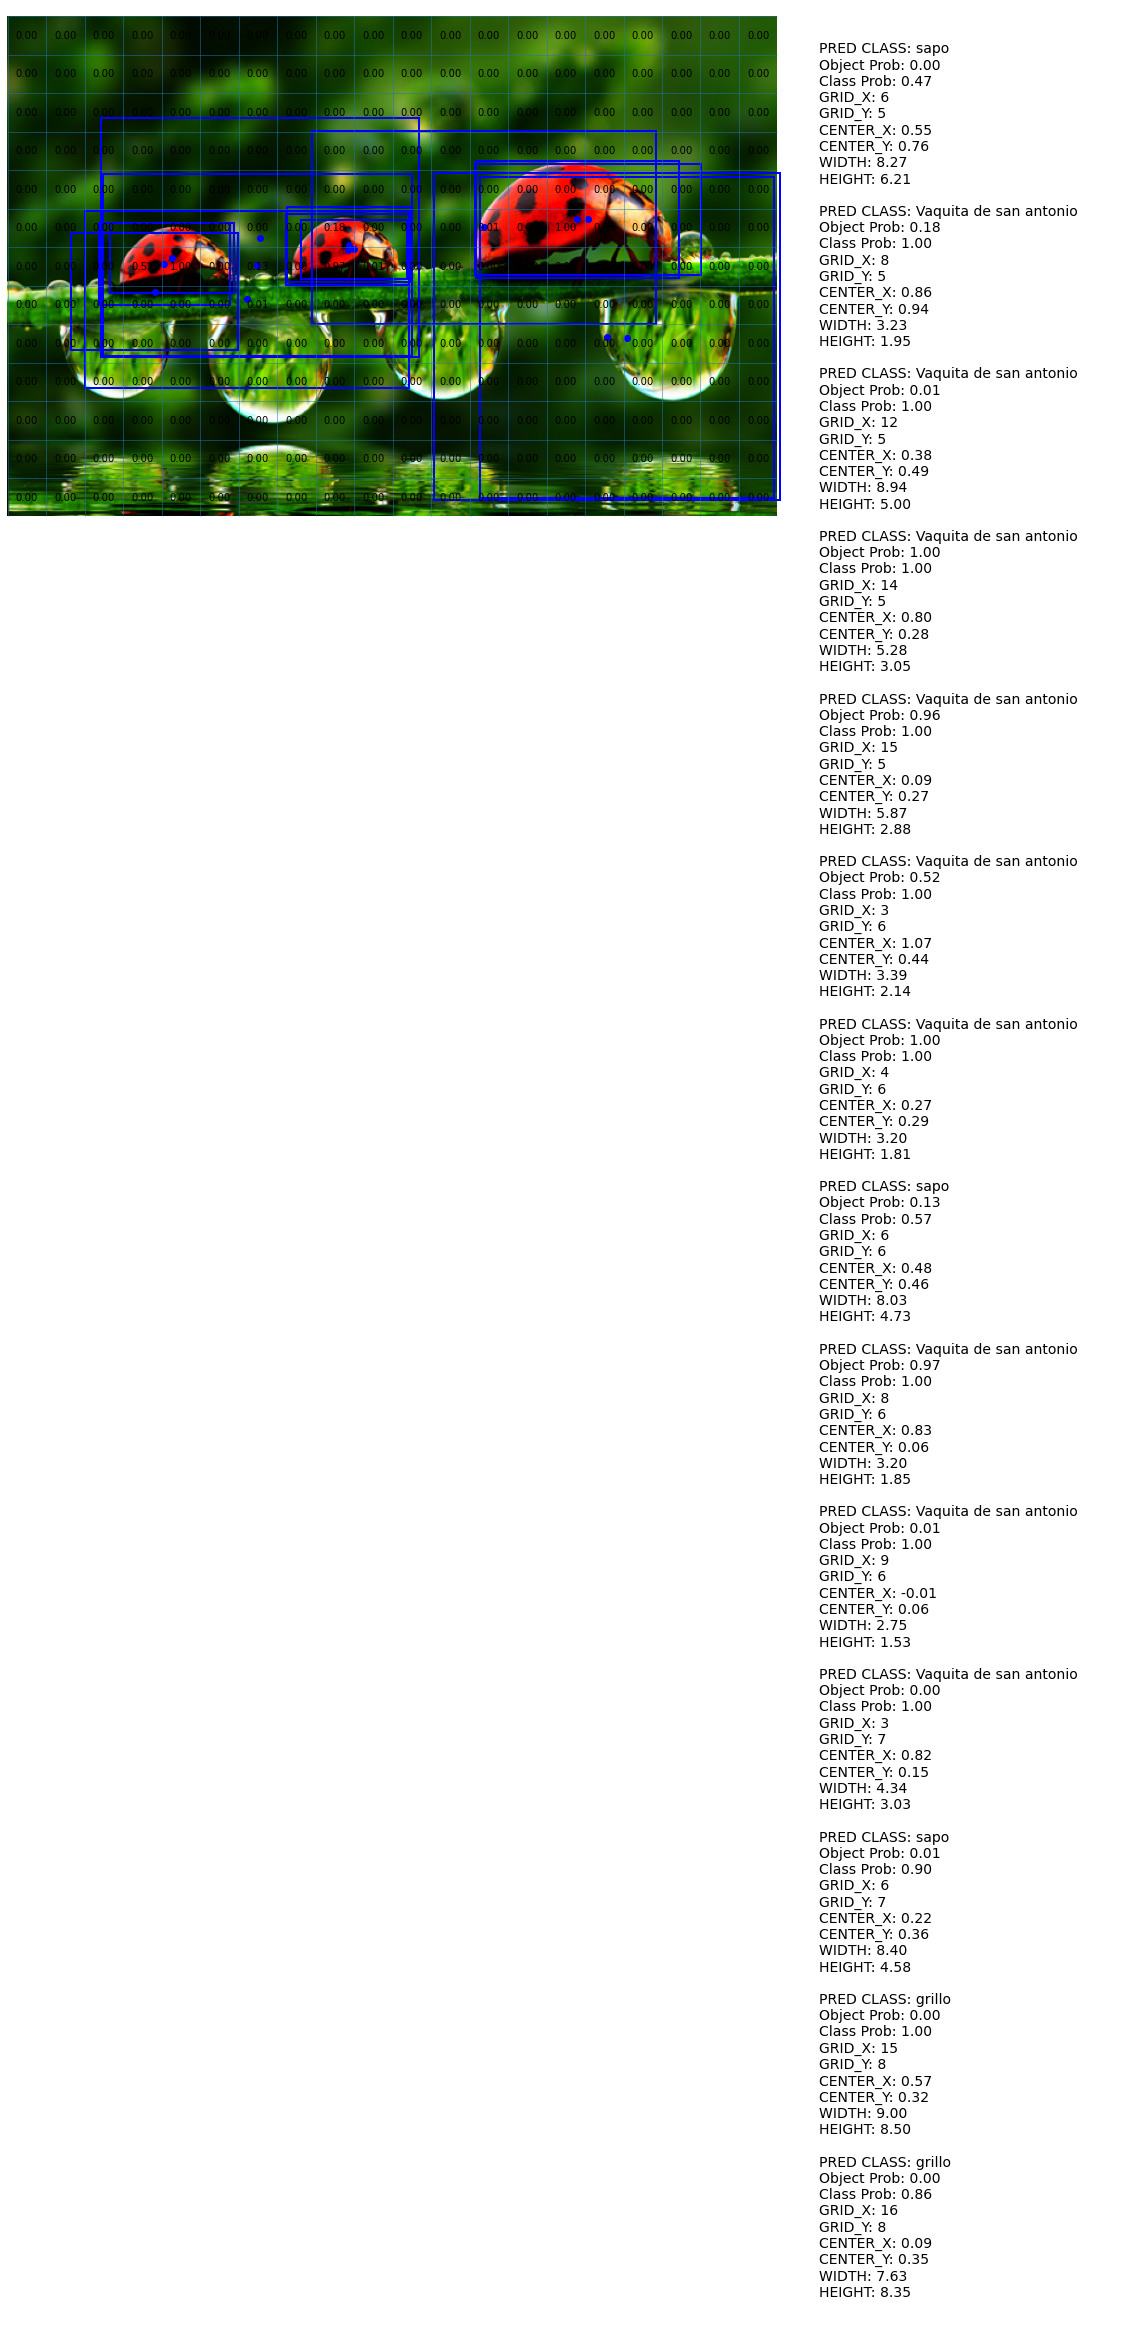

In [11]:
pred_processed = plot_bboxes(image_array[0], predictions[0], idx_2_class_id, classes_names, thres=0.001)